## Recurrence, Depth and High-dimensional data
# Python ANN notebook

## Introduction

In this notebook we will:
- Code in plain NumPy a simple deep feedforward artificial neural network to classify the MNIST dataset.
- Implement the stochastic gradient descent learning algorithm and train our network using backpropagation.
- Play with the network to better understand the role of each element and acheive better performance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

### 1 Preprocessing

1. Load the MNIST dataset and reduce the size of the images by two.

2. Reshape the training and test images to arrays of size ($N_x,N_{batch}$).  Reshape the training and test labels to one-hot vectors.

3. Vizualize an example image.

### 2 Initialization

Let us consider a 3-layer network: one input layer of size $N_x$, one hidden layer of size $N_h$, and one output layer of size $N_y$.

In vector notation, this gives:

\begin{eqnarray}
\mathbf{h} &= \sigma(\mathbf{z}^1), \quad \mathbf{z}^1 &= \mathbf{W}^{1}\mathbf{x}+\mathbf{b}^{1},\\
\hat{\mathbf{y}} &= \sigma(\mathbf{z}^2), \quad \mathbf{z}^2 &= \mathbf{W}^{2}\mathbf{h}+\mathbf{b}^{2},
\end{eqnarray}

where $\sigma$ denotes a sigmoidal point-wise non-linearity and $\mathbf{x}$ an input vector.

We will use a quadratic cost to evaluate the performance of the network:
\begin{eqnarray}
\mathcal{C} = \frac{1}{2}\| \mathbf{y} - \hat{\mathbf{y}} \|^2 = \frac{1}{2}(\mathbf{y} - \hat{\mathbf{y}})^T(\mathbf{y} - \hat{\mathbf{y}}) 
\end{eqnarray}

where $(\mathbf{x},\mathbf{y})$ is a pair of training data.

In component form, this is:
\begin{eqnarray}
h_i &= \sigma(\sum_j W^{1}_{ij}x_j+b^{1}_i), \\
\hat{y}_i &= \sigma(\sum_j W^{2}_{ij}h_j+b^{2}_i), \\
\mathcal{C} &= \frac{1}{2 n}\sum_k(\mathbf{y}_k - \hat{\mathbf{y}}_k)^2.
\end{eqnarray}

The component form is for your understanding, but coding it up that way would be inefficient. 

Let us start with a 3-layer network where $N_x = 2, N_h=3,$ and $N_y=1$.

Write a function called `initialize` that generates the two connection matrices, $W^{1}$ and $W^{2}$, and two biases, $b^1$ and $b^2$. What size should they be? For now, fill them with random numbers drawn from a Gaussian distribution with mean 0, and variance 1.

`Note that the first layer is assumed to be an input layer, and by convention we won't set any biases for those neurons, since biases are only ever used in computing the outputs from later layers.`

In [6]:
def initialize_simple(n_input, n_hidden, n_output):

    
    return params

In [7]:
p = initialize_simple(2,3,1)

[optional] Generalize this function to deep feedforward network with $D$ layers of weights $\mathbf{W}^1, ... ,\mathbf{W}^D$ and $D + 1$ layers of neural activity vectors $\mathbf{x}^0, ... , \mathbf{x}^D$, with $N^l$ neurons in each layer $l$, so that $\mathbf{x}^l ∈ R ^ {N^l}$ and $\mathbf{\mathbf{W}}^l$ is an $N^l × N^{l−1}$ weight matrix:

\begin{eqnarray}
\mathbf{x}^{l} = \phi(\mathbf{z}^{l}), \qquad \mathbf{z}^{l} = \mathbf{W}^{l}\mathbf{x}^{l-1}+\mathbf{b}^{l}, \qquad \text{ for } l = 1,...,D.
\end{eqnarray}


``` The input to this function should be a list containing the number of neurons in the respective layers of the network.
For example, if the list was [196, 50, 30, 10] then itwould be a four-layer network, with the first layer containing 196 neurons, the second layer 50 neurons, the third layer 30 neurons and the last layer 10 neuron.```

Tip: use zip, a python built-in function.

In [8]:
def initialize(sizes):

    
    return params

In [9]:
params = initialize([196,50,30,10])

### 3 Feedforward pass

Write a function called `sigmoid` that applies the sigmoidal non-linearity to its input:

$$\sigma(\mathbf{z}) = \frac{1}{1 + e^{-\mathbf{z}}}$$

In [10]:
def sigmoid(z):
    """The sigmoid function."""
    return 

Write a function called `feedforward` that takes the inputs, $x$ (an array), and the connection matrices, and returns the output, $\hat{y}$.

Use the NumPy's matrix multiplication function, `dot` and the `sigmoid` function that you just wrote.

Make sure that your code can simultaneously (and efficiently) evaluate the output for many $x$. The input matrix now is given in the form of a 2-dimensional array $X$ of size $(N_x,N_{\mathrm{batch}})$.

Create some random input of this form and run it through your network.

In [11]:
def feedforward_simple(params, x):
    
    
    return y_hat

In [12]:
feedforward_simple(p, np.random.randn(2,10))

array([[ 0.71983476,  0.71180071,  0.69890168,  0.70539463,  0.71049355,
         0.72533837,  0.71119558,  0.71194165,  0.71308866,  0.7009229 ]])

[optional] Generalize this function to networks of arbitrary depth. 

Tip: use zip, a python built-in function.

In [13]:
def feedforward(params, a):

    return a

In [14]:
feedforward(params, x_train).shape

(10, 60000)

<Container object of 3 artists>

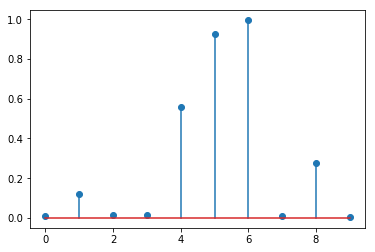

In [15]:
plt.stem(feedforward(params, x_train)[:,0])

### 4 Evaluation

1. Write a function called `evaluate` that returns the number of test inputs for which the neural network outputs the correct result. Note that the neural network's output is assumed to be the index of whichever neuron in the final layer has the highest activation.

2. Evaluate the naive network, and check that it performs at chance level.

In [16]:
def evaluate(params, (x_test, y_test)):

    return 

In [17]:
evaluate(params, (x_test, y_test))

880

### 5 Computing Gradients

Now let's turn to traning our network: given a training set of input/output examples, $(x,y)$, we want to bring the network's output $\hat{y}$ closer to the desired label $y$.

<img src="fig/backprop.png" style="width:80%;height:80%;display:inline;margin:1px">

Write a function called `cost_derivative` that returns the vector of partial derivatives $\partial C_x / \partial y $ a for the output activations.

In [18]:
def cost_derivative(output_activations, y):
    return 

Write a function called `sigmoid_prime` that returns the derivative of the sigmoid function.

In [19]:
def sigmoid_prime(z):
    return 

Write a function called `backprop` that returns a tuple ``(nabla_b1, nabla_b2, nabla_w2, nabla_w2)`` representing the gradient for the cost function C_x.

In [20]:
def compute_gradients_simple(params, x, y):
    
    return 

In [1]:
# test


[optional] Generalize: Write a function called `backprop` that returns a tuple ``(nabla_b, nabla_w)`` representing the gradient for the cost function C_x. ``nabla_b`` and ``nabla_w`` are layer-by-layer lists of numpy arrays, similar to ``params['biases']`` and ``params['weights']``.

In [22]:
def compute_gradients(params, x, y):
    
    return (nabla_b, nabla_w)

### 6 Gradient Descent

Write a function that implements gradient descent on our simple network using the function we just coded.

In [24]:
training_data = [x_train, y_train]
test_data = [x_test, y_test]

[optional] Generalize to networks of arbitrary depth. Explain what computational gain is achieved by gradient descent (compare reverse mode differentiation to forward mode differentiation).

### 7 Minibatch

Write a function called `update_minibatch` that update the network's weights and biases by applying gradient descent using backpropagation to a single mini batch. The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta`` is the learning rate.

In [ ]:
def update_mini_batch_simple(params, mini_batch, eta):
    

[optional] Generalize to networks of arbitrary depth.

In [26]:
def update_mini_batch(params, mini_batch, eta):
    

[optional] Write a generalized function called `SGD` that takes as input: `params, training_data, epochs, mini_batch_size, eta` and performs the optimization.

Add an optional `test_data` argument to your function to evaluate the network against the test data after each epoch  and print partial progress printed.  Note that this is useful for tracking progress, but slows things down substantially.

In [29]:
def SGD(params, training_data, epochs, mini_batch_size, eta,
        test_data=None):


In [ ]:
SGD(params, training_data, epochs=3, mini_batch_size=10, eta=3.0, test_data=test_data)

In [ ]:
plt.figure()
plt.imshow(params['weights'][0], aspect = )
plt.show()

### Optional Project


** Fiddling with our simple network**
- write a class called Network that contains and organizes all the above code
- vizualize the evolution of the parameters, plot the mean and variance of gradients along learning

- optimization: momentum, etc.
- activation function: sigmoid (beware of the vanishing gradients on sigmoids), relu (beware of the dying ReLUs)
- regularization: penalize large weights, implement dropout (multiply by Bernoulli matrix), etc.
- error function: cross-entropy, etc.
- learning rate: use recent history, eg. adagrad, adam, etc.
- initialization: uniform, gaussian, etc.

- what happens if you apply a simple linear transformation to the test data?

- explore
    